# CO2 and Global Temperature Anomaly 

The rise of our planet's average surface temperature could largely be attributed to increased carbon dioxide and other human-made emissions into the atmosphere according to the IPCC AR5 report. We can easily check the latest CO2 and global temperature data in one figure based on publicly available datasets.

CO2 data was downloaded from [esrl](https://www.esrl.noaa.gov/gmd/ccgg/trends/data.html), covering the period from Mar/1958 to Apr/2018. CO2 expressed as a mole fraction in dry air, micromol/mol, abbreviated as ppm.

Global temperature anomaly (GTA, $^oC$) was downloaded from [ncdc](https://www.ncdc.noaa.gov/cag/global/time-series/globe/land_ocean/all/3/1958-2018). The data come from the Global Historical Climatology Network-Monthly (GHCN-M) data set and International Comprehensive Ocean-Atmosphere Data Set (ICOADS), which have data from 1880 to the present. These two datasets are blended into a single product to produce the combined global land and ocean temperature anomalies. The available timeseries of global-scale temperature anomalies are calculated with respect to the 20th century average. To match the period of CO2 data, only the period from Jan/1958 to Mar/2019 was used in this notebook.

## 1. Load all needed libraries

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

# Set some parameters to apply to all plots. These can be overridden
import matplotlib
# Plot size to 14" x 7"
matplotlib.rc('figure', figsize = (14, 7))
# Font size to 14
matplotlib.rc('font', size = 14)
# Do not display top and right frame lines
matplotlib.rc('axes.spines', top = False, right = False)
# Remove grid lines
matplotlib.rc('axes', grid = False)
# Set backgound color to white
matplotlib.rc('axes', facecolor = 'white')

matplotlib inline


## 2. Read Data

### 2.1 CO2

In [2]:
co2 = pd.read_csv('data\co2_mm_mlo.txt', 
                  skiprows=72,
                  header=None, 
                  comment = "#", 
                  delim_whitespace = True, 
                  names = ["year", "month", "decimal_date", "average", "interpolated", "trend", "days"],
                  na_values =[-99.99, -1])

co2['YM'] = co2['year']*100 + co2['month']
co2['YM'] = pd.to_datetime(co2['YM'], format='%Y%m', errors='ignore')
co2.set_index('YM', inplace=True)
co2.drop(["year", "month", "decimal_date", "average",  "trend", "days"], axis=1, inplace=True)

### 2.2 Global Temperature Anomalies

In [3]:
gta = pd.read_csv('data\gta_1958_2018.csv', 
                  sep=",", 
                  skiprows=5,
                  names = ["YM", "GTA"])
gta['YM'] = pd.to_datetime(gta['YM'], format='%Y%m', errors='ignore')
gta.set_index('YM', inplace=True)

### 2.3 Merge CO2 and GTA into one dataframe

In [4]:
co2gta = co2.join(gta)

## 3. Visualize CO2 and GTA in one figure

### 3.1 Define a function for a plot with two y axes

In [5]:
def lineplot2y(x_data, x_label, y1_data, y1_color, y1_label, y2_data, y2_color, y2_label, title):
    # Each variable will actually have its own plot object but they
    # will be displayed in just one plot
    # Create the first plot object and draw the line
    _, ax1 = plt.subplots()
    ax1.plot(x_data, y1_data, color = y1_color)
    # Label axes
    ax1.set_ylabel(y1_label, color = y1_color)
    ax1.set_xlabel(x_label)
    ax1.set_title(title)

    # Create the second plot object, telling matplotlib that the two
    # objects have the same x-axis
    ax2 = ax1.twinx()
    ax2.plot(x_data, y2_data, color = y2_color)
    ax2.set_ylabel(y2_label, color = y2_color)
    # Show right frame line
    ax2.spines['right'].set_visible(True)

### 3.2 Call the function to create plot

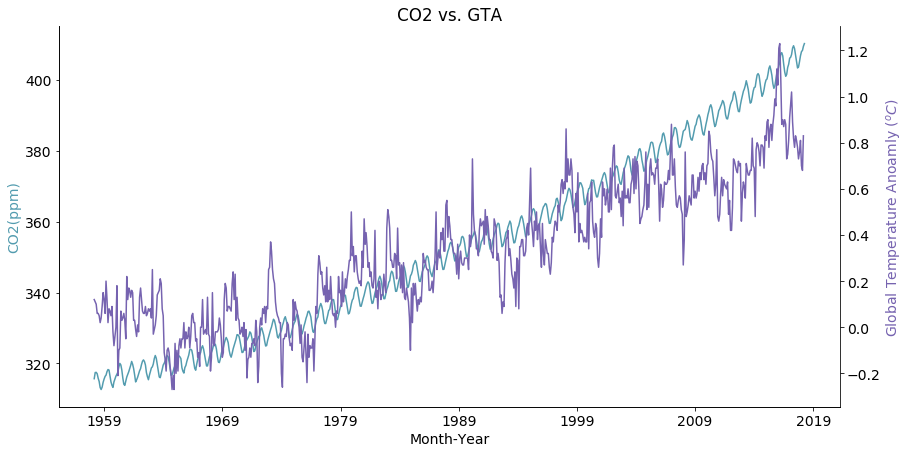

In [6]:
lineplot2y(x_data = co2gta.index
           , x_label = 'Month-Year'
           , y1_data = co2gta['interpolated']
           , y1_color = '#539caf'
           , y1_label = 'CO2(ppm)'
           , y2_data = co2gta['GTA']
           , y2_color = '#7663b0'
           , y2_label = 'Global Temperature Anoamly ($^oC$)'
           , title = 'CO2 vs. GTA')

## References

Dr. Pieter Tans, NOAA/ESRL (www.esrl.noaa.gov/gmd/ccgg/trends/) and Dr. Ralph Keeling, Scripps Institution of Oceanography (scrippsco2.ucsd.edu/).

NOAA National Centers for Environmental information, Climate at a Glance: Global Time Series, published April 2018, retrieved on May 16, 2018 from http://www.ncdc.noaa.gov/cag/

C.D. Keeling, R.B. Bacastow, A.E. Bainbridge, C.A. Ekdahl, P.R. Guenther, and L.S. Waterman, (1976), Atmospheric carbon dioxide variations at Mauna Loa Observatory, Hawaii, Tellus, vol. 28, 538-551

K.W. Thoning, P.P. Tans, and W.D. Komhyr, (1989), Atmospheric carbon dioxide at Mauna Loa Observatory 2. Analysis of the NOAA GMCC data, 1974-1985, J. Geophys. Research, vol. 94, 8549-8565

Etheridge, D. M., L. P. Steele, R. L. Langenfelds, R. J. Francey, J.-M. Barnola, and V. I. Morgan, (1996), Natural and anthropogenic changes in atmospheric CO2 over the last 1000 years from air in Antarctic ice and firn, J. Geophys. Res., 101(D2), 4115–4128, doi:10.1029/95JD03410.

John D. Hunter. Matplotlib: A 2D Graphics Environment, Computing in Science & Engineering, 9, 90-95 (2007), DOI:10.1109/MCSE.2007.55

Wes McKinney. Data Structures for Statistical Computing in Python, Proceedings of the 9th Python in Science Conference, 51-56 (2010)